**3. Use Decision Tree (DT) and Gaussian Naive Bayes (GNB) classifier to train Dataset**

Split the data into 60-20-20 train-val-test splits. Implement K-Fold cross validation for both GNB and DT.

1. Save the best model, load the saved model to predict the results on the test data.

2. Evaluate testing data on the basis of accuracy, precision, recall, F1-Score,
plot ROC-curve and confusion matrix.

3. Find optimal depth as a parameter in-case of DT using Grid Search and use
K-Fold cross validation to validate it.

4. For DT plot training and validation accuracy plot with respect to tree depth
and write your analysis.

**Data Description and Data Pre-processing**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
column_names = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight',
         'shell weight','rings'] #abalone.names go the header name
df = pd.read_csv('/content/abalone.data',names = column_names)
print("Total Number of samples: %d" % len(df))
df.head(5)

# Here I think total number of sentences code is also counting the header(or column) line

Total Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


statistical description

In [47]:
df.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [48]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['sex'] = LE.fit_transform(df['sex'])

Data pre-processing

To see if the dataset has a balanced data

**Train Models**

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

2. **Evaluate testing data on the basis of accuracy, precision, recall, F1-Score, plot ROC-curve and confusion matrix.**

In [52]:
X = df.drop(['sex'], axis=1)
y = df.sex

k = 10
kf = KFold(n_splits=k,shuffle=False)
model = LinearRegression() 

model_classify = [GaussianNB,DecisionTreeClassifier]
preds_classify = []

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=123)

df1 = pd.concat([X_train,Y_train],axis=1)

from sklearn.metrics import classification_report
from sklearn import datasets, metrics, model_selection, svm
for model in model_classify:
  for train_index ,val_index in kf.split(df1):
        x_train , x_val = X.iloc[train_index,:],X.iloc[val_index,:]
        y_train , y_val = y.iloc[train_index.tolist()] , y.iloc[val_index.tolist()]    
        m = model()
        mod = m.fit(x_train, y_train)
        preds = m.predict(x_val)
        preds_classify.append(preds)

  print("\nClassification Report: ")
  print(classification_report(y_val, preds))
 
  print("\n")\


Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.62      0.56       126
           1       0.49      0.82      0.61        82
           2       0.41      0.13      0.20       126

    accuracy                           0.49       334
   macro avg       0.47      0.52      0.46       334
weighted avg       0.47      0.49      0.44       334




Classification Report: 
              precision    recall  f1-score   support

           0       0.37      0.35      0.36       126
           1       0.53      0.56      0.55        82
           2       0.43      0.44      0.43       126

    accuracy                           0.43       334
   macro avg       0.44      0.45      0.45       334
weighted avg       0.43      0.43      0.43       334





a). **Save the best model, load the saved model to predict the results on the test data**

In [55]:
import pickle
 # Save the trained model as a pickle string.
m = DecisionTreeClassifier()
#m = GridSearchCV(DecisionTreeClassifier(), parameters_tree, cv=10)
saved_model = pickle.dumps(m.fit(X_train,Y_train)) 
# Load the pickled model
dt = pickle.loads(saved_model)  
# Use the loaded pickled model to make predictions
pred = dt.predict(X_test)

Decision Tree is the best model as accuracy is 0.51 as compare to GNB

In [56]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.41      0.44      0.42       242
           1       0.67      0.64      0.65       280
           2       0.47      0.45      0.46       314

    accuracy                           0.51       836
   macro avg       0.51      0.51      0.51       836
weighted avg       0.52      0.51      0.51       836



# **Plot Confusion matrix**

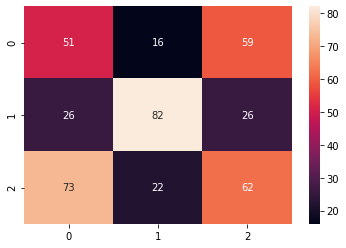

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, preds)
sns.heatmap(cf_matrix, annot=True)

# **Plot ROC Curve**

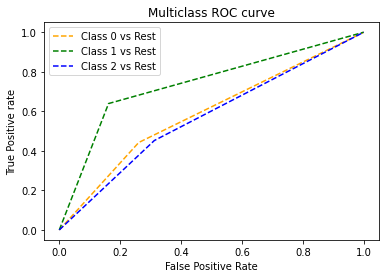

In [59]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
pred_prob = dt.predict_proba(X_test)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

c. **Find optimal depth as a parameter in-case of DT using Grid Search and use K-Fold cross validation to validate it**

In [64]:
y_score = dt.predict(X_test)

#Grid search to find optimal
parameters = {'max_depth':range(3,20)}
dtree_gscv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
dtree_gscv.fit(X=X, y=y)
tree_model = dtree_gscv.best_estimator_
print (dtree_gscv.best_score_, dtree_gscv.best_params_) 

#validating the result
dtree_gscv = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(estimator=dtree_gscv, X=X, y=y,cv=5, n_jobs=4)
scores.mean()

0.5482376873048163 {'max_depth': 5}


0.5482376873048163

d. **For DT plot training and validation accuracy plot with respect to tree depth and write your analysis**

[(3, 0.5408236090553394), (4, 0.5523177630144688), (5, 0.5513671359563067), (6, 0.5439457046802749), (7, 0.529591637694629), (8, 0.5379631223251065), (9, 0.5281459043291683), (10, 0.5262217020641861), (11, 0.5221529953071037), (12, 0.5077782749876654), (13, 0.5152020010785631), (14, 0.5001187566693057), (15, 0.49964028776978414), (16, 0.48839454751987876), (17, 0.4953346413778069), (18, 0.4994136748017854), (19, 0.491029568689546)]


ValueError: ignored

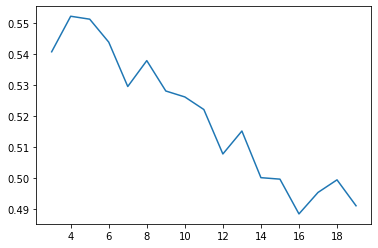

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=123)
depth = []

k=10
kf = KFold(n_splits=k,shuffle=True,random_state=20)

d=[]
acc=[]
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(X=X_train, y=Y_train)
    scores = cross_val_score(estimator=clf, X=X, y=y,cv=kf, n_jobs=4)
    depth.append((i,scores.mean()))
    d.append(scores.mean())

    pred = clf.predict(X_test)
    acc.append(accuracy_score(Y_test, pred))

print(depth)

l = np.arange(3, 20, 1)
plt.plot(l,d) # Plot training accuracy over depth
plt.plot(l,acc) # Plot Validation accuracy over depth